In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import configparser
import os
from pathlib import Path

import aps
import aps.ai.autoalignment.beamline28IDB.optimization.analysis_utils as analysis
import aps.ai.autoalignment.beamline28IDB.optimization.common as opt_common
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import scipy
from IPython.display import Image, display_png

%matplotlib inline

28-ID - VKB Pitch Motor Resolution: 2e-05 deg
Qt5Agg: unable to import specified backend (or its dependency); no plots


**** The executable "caRepeater" couldn't be located
**** because of errno = "No such file or directory".
**** You may need to modify your PATH environment variable.
**** Unable to start "CA Repeater" process.
Traceback (most recent call last):
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot.py", line 57, in uti_plot_init
    _backend = uti_plot_matplotlib.Backend(backend, fname_format)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 27, in __init__
    backend = self._init_ipython(backend)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 724, in _init_ipython
    get_ipython().magic('matplotlib ' + b)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.

In [4]:
exp_type = 'peak_nlpi'

In [5]:
#base_dir = Path(aps.__file__).parents[1]
#autoalign_dir = base_dir / f'work_directory/28-ID/AI/autoalignment/'
autoalign_dir = Path("/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/")
data_base_dir = autoalign_dir / exp_type / 'raw'
print(f'data base dir exists {data_base_dir.exists()}')


data base dir exists True


In [6]:
!ls {data_base_dir}

peak_nlpi_150_2022-11-18_images
peak_nlpi_150_2022-11-18_steps
peak_nlpi_autofocusing.ini
peak_nlpi_moo_150_2022-11-19_images
peak_nlpi_moo_150_2022-11-19_steps
peak_nlpi_moo_autofocusing.ini
peak_nlpi_moo_optimization_final_150_2022-11-19_07:35.gz
peak_nlpi_optimization_final_150_2022-11-18_19:51.gz


### peak_fwhm_150_2022-11-18

In [7]:
!ls {data_base_dir}

peak_nlpi_150_2022-11-18_images
peak_nlpi_150_2022-11-18_steps
peak_nlpi_autofocusing.ini
peak_nlpi_moo_150_2022-11-19_images
peak_nlpi_moo_150_2022-11-19_steps
peak_nlpi_moo_autofocusing.ini
peak_nlpi_moo_optimization_final_150_2022-11-19_07:35.gz
peak_nlpi_optimization_final_150_2022-11-18_19:51.gz


In [8]:
log_file = Path(data_base_dir / 'peak_nlpi_optimization_final_150_2022-11-18_19:51.gz')
log_file.exists()

True

In [9]:
hist_dir = Path(data_base_dir / 'peak_nlpi_150_2022-11-18_steps')
hist_dir.exists()

True

In [10]:
study = analysis.create_study_from_trials(log_file, directions=['minimize', 'minimize'])

[I 2022-11-21 02:17:47,836] A new study created in memory with name: no-name-f1cf801f-434c-4de7-9c0e-821511552628


Number of objectives is ignored if directions are supplied.


In [11]:
n_steps = len(study.trials)

In [12]:
hists = analysis.load_histograms_from_files(n_steps, hist_dir, extension='gz')

In [13]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [14]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)
print("Actual fwhm (not with reference)", opt_common._get_fwhm_from_dw(nash_trial.user_attrs["dw"]))

[149, 139]
69 [0.00045981565522807544, -11.087549209594727]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3899200178503135, 'h_fwhm': 0.011055118110236961, 'h_centroid': -4.0366505419164866e-05, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.4570916634240458, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.006061900236251833, 'v_peak': 0.0003251270027353485, 'integral_intensity': 285.9208497684257, 'peak_intensity': 65352.36, 'gaussian_fit': {}}}
Actual fwhm (not with reference) 0.012508592584035905


CA client library is unable to contact CA repeater after 50 tries.
Silence this message by starting a CA repeater daemon
or by calling ca_pend_event() and or ca_poll() more often.


Trial number 69
Trial values: peak_distance 4.598e-04 fwhm -1.109e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3899200178503135, 'h_fwhm': 0.011055118110236961, 'h_centroid': -4.0366505419164866e-05, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.4570916634240458, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.006061900236251833, 'v_peak': 0.0003251270027353485, 'integral_intensity': 285.9208497684257, 'peak_intensity': 65352.36, 'gaussian_fit': {}}}
Actual fwhm 0.012508592584035905


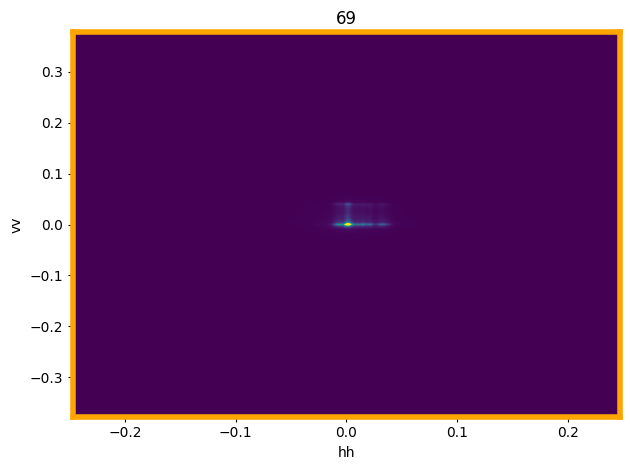

Trial number 125
Trial values: peak_distance 3.591e-03 fwhm -1.109e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3901526613256635, 'h_fwhm': 0.0149569245020853, 'h_centroid': 0.000552391650113504, 'h_peak': -0.003576655859194136, 'v_sigma': 0.45724748817383143, 'v_fwhm': 0.006502540054709183, 'v_centroid': 0.005675246510603665, 'v_peak': 0.0003251270027353485, 'integral_intensity': 285.57855573225874, 'peak_intensity': 65369.61, 'gaussian_fit': {}}}
Actual fwhm 0.01630928011054372


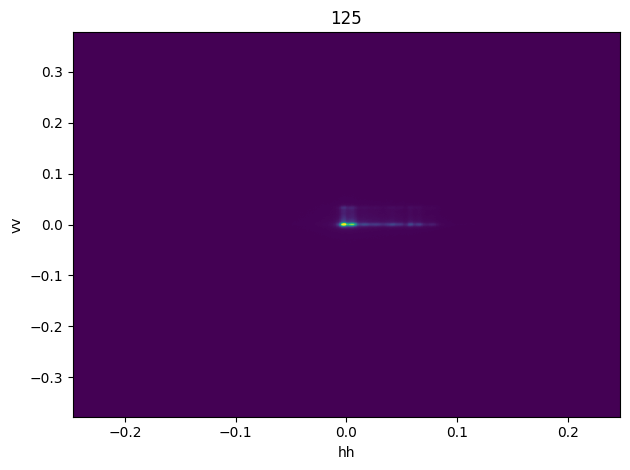

In [15]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    print("Actual fwhm", opt_common._get_fwhm_from_dw(t.user_attrs["dw"]))
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    if t.number == nash_trial.number:
        for axis in ['top','bottom','left','right']:
            plt.gca().spines[axis].set_linewidth(4)
            plt.gca().spines[axis].set_color('orange')
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.title(t.number)
    plt.tight_layout()
    plt.show()

In [16]:
study.best_trials[0].values

[0.00045981565522807544, -11.087549209594727]

In [17]:
pareto_df = analysis.get_pareto_dataframe_from_study(study, ['peak_distance', 'nlpi'])

In [18]:
pareto_df

,number,peak_distance,nlpi,h_peak,v_peak,h_fwhm,v_fwhm,peak_intensity
69,69,0.000460,-11.087549,-0.000325,0.000325,0.011055,0.005852,65352.359375
125,125,0.003591,-11.087812,-0.003577,0.000325,0.014957,0.006503,65369.609375


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_91035/301787876.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance",  "nlpi"], include_dominated_trials=False)


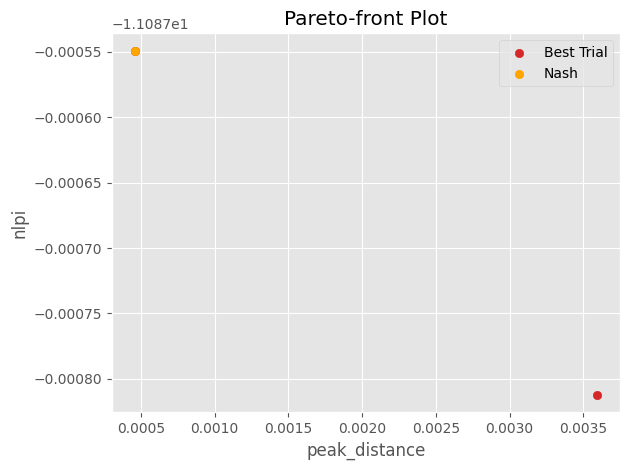

In [21]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance",  "nlpi"], include_dominated_trials=False)
plt.scatter(*nash_trial.values, color='orange', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_91035/320309324.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


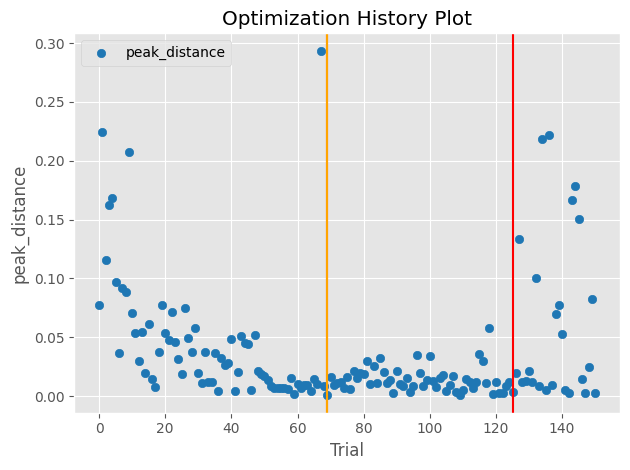

In [22]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_91035/205058893.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="nlpi")


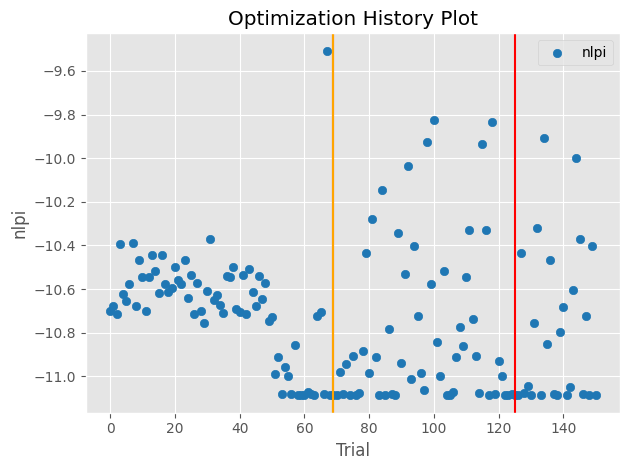

In [23]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="nlpi")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [24]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    isum1, wsum1 = analysis.calculate_weighted_sum(h, threshold=0)
    isum2, wsum2 = analysis.calculate_weighted_sum(h)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_91035/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


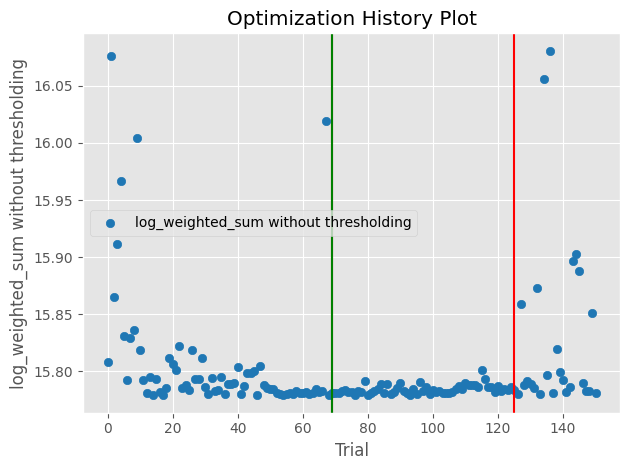

In [25]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_91035/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


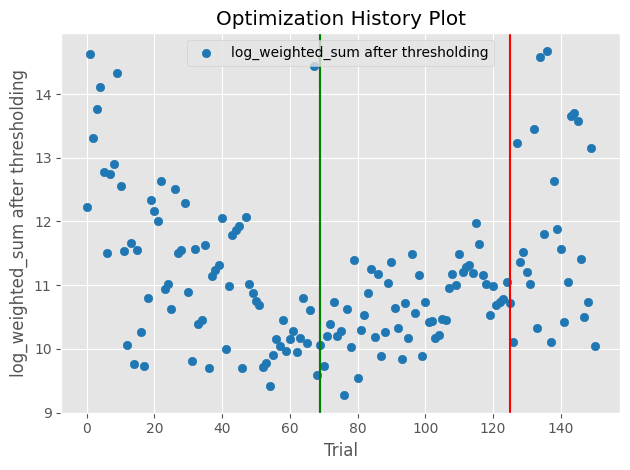

In [26]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [28]:
test_val_fns = [lambda t: t.values[0], lambda t: t.values[1], lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins))

69


36 [0.0046211232547546605, -10.538695335388184, 9.697100951530745]


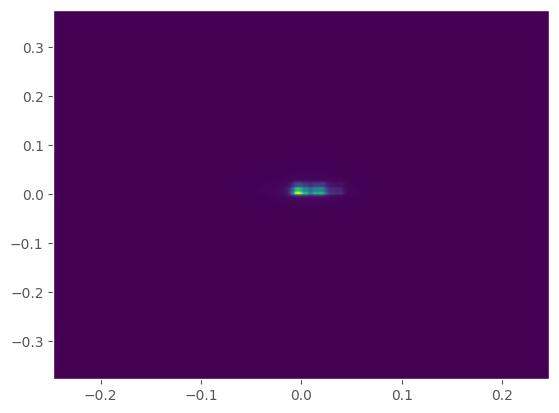

46 [0.004973500638303536, -10.542255401611328, 9.706051452052902]


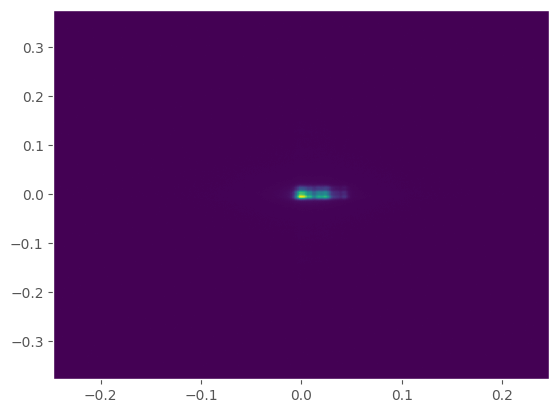

59 [0.001657944296421793, -11.086146354675293, 9.965382505429638]


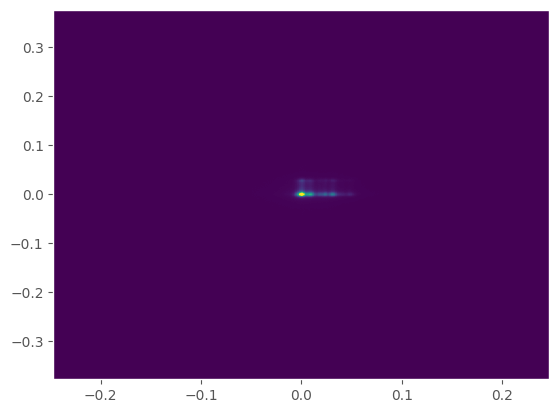

68 [0.00863939269010076, -11.08748722076416, 9.587603699825099]


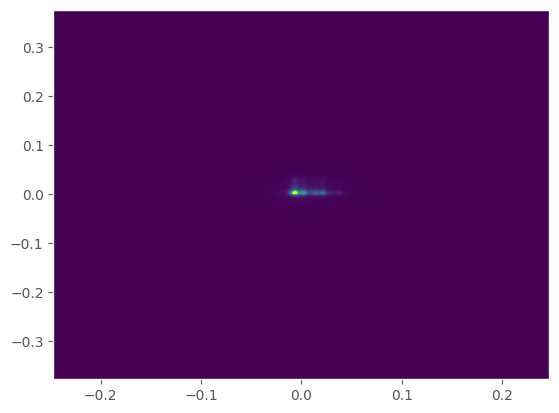

69 [0.00045981565522807544, -11.087549209594727, 10.058032023260651]


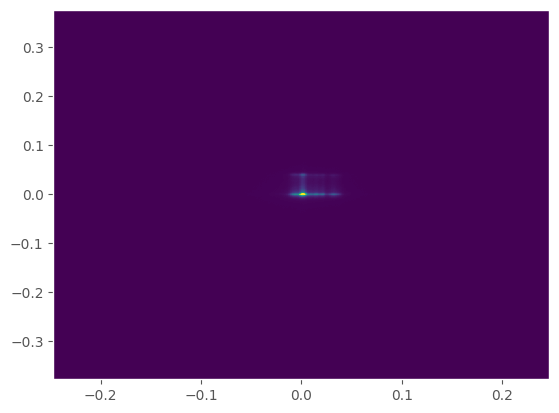

76 [0.005977757099054596, -11.08720588684082, 9.269592246115224]


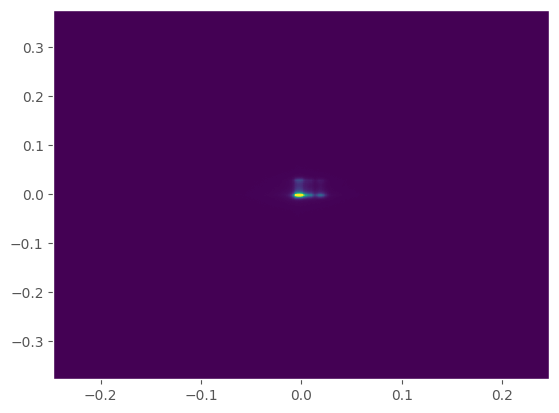

125 [0.0035914028878720103, -11.087812423706055, 10.728612118881559]


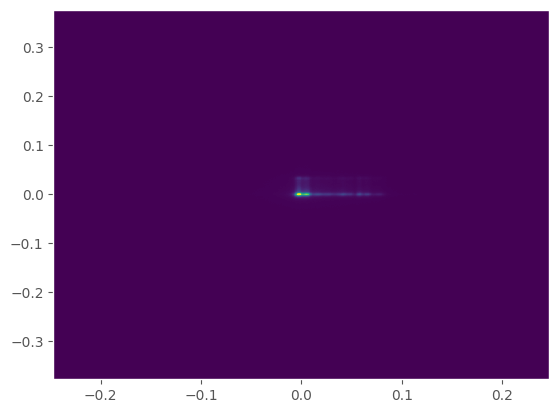

150 [0.0024762448761266446, -11.086923599243164, 10.050310501931474]


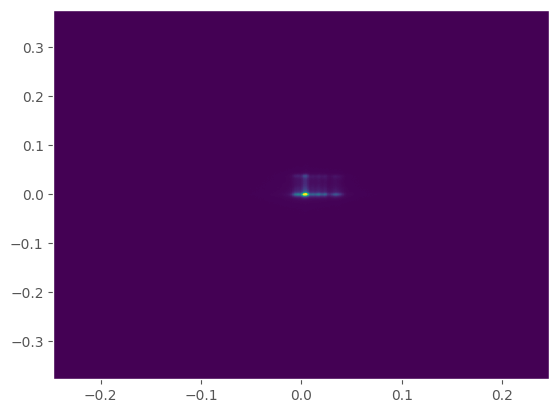

In [29]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [30]:
test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins), domins[np.argmax(domins)])

69 122


36 [0.0046211232547546605, 0.0381073624718826, 9.697100951530745]


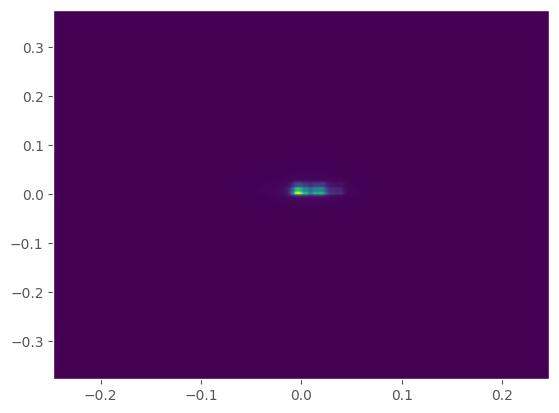

59 [0.001657944296421793, 0.01718045128821458, 9.965382505429638]


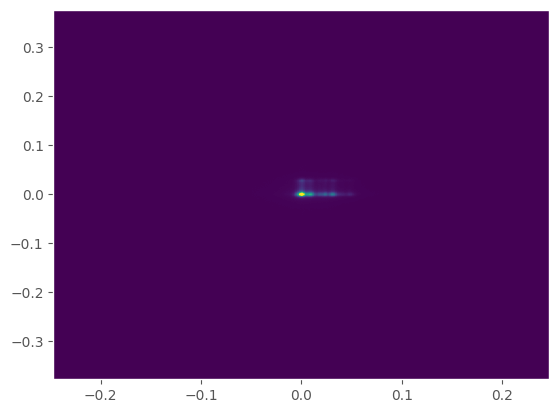

69 [0.00045981565522807544, 0.012508592584035905, 10.058032023260651]


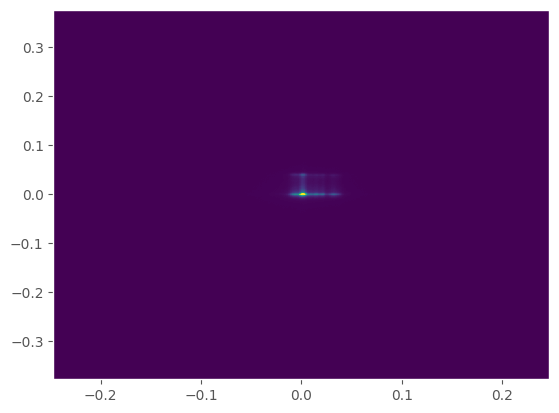

70 [0.015802042532051613, 0.013005682483180311, 9.733752676903503]


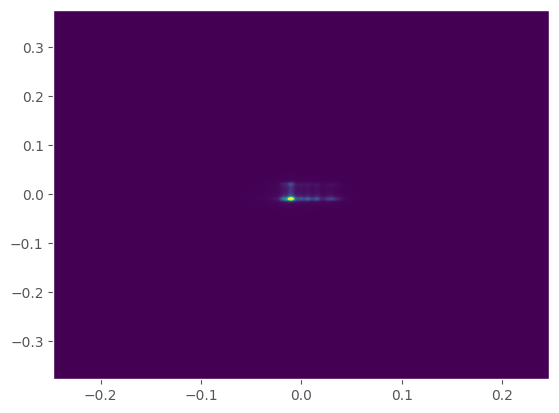

76 [0.005977757099054596, 0.01587549443185906, 9.269592246115224]


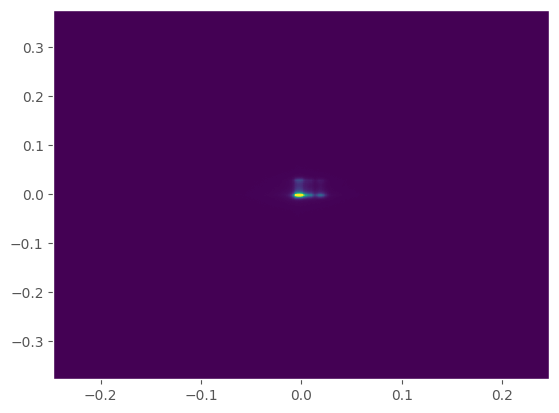

78 [0.015693963318527578, 0.014438340187668017, 10.030995327220719]


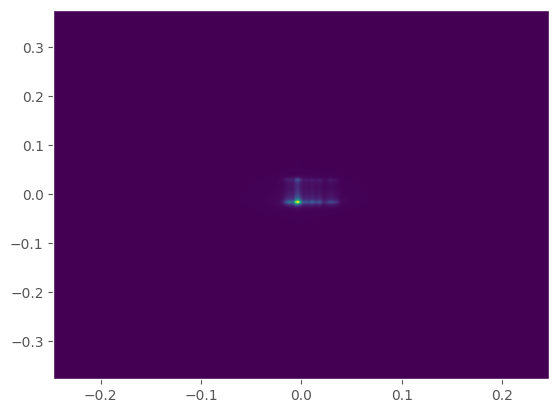

105 [0.0045287806349269205, 0.010822937734649695, 10.462724610856853]


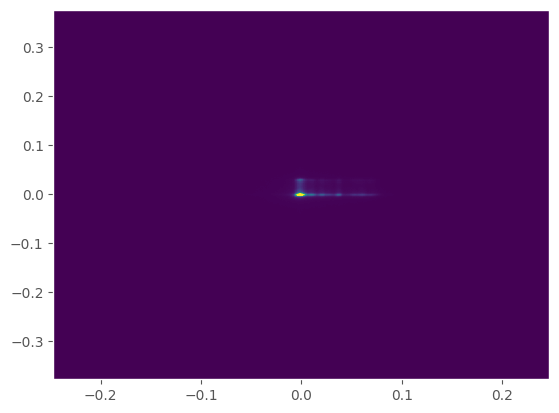

148 [0.024646710365230577, 0.010585784588079523, 10.731701843898506]


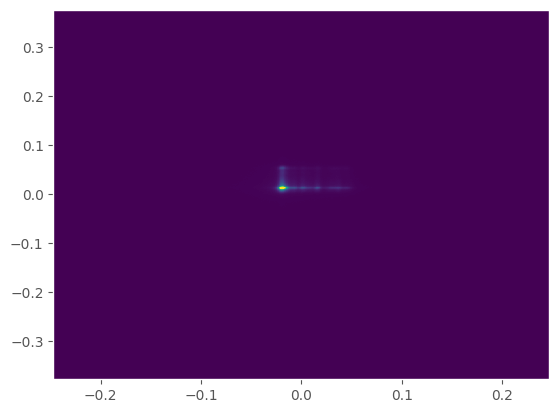

150 [0.0024762448761266446, 0.01103557572547687, 10.050310501931474]


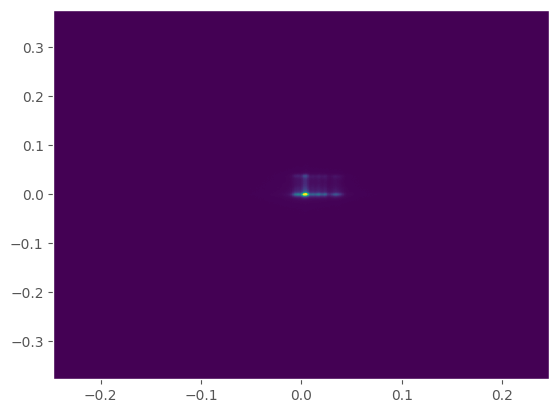

In [31]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

### peak_nlpi_moo

In [32]:
!ls $data_base_dir

peak_nlpi_150_2022-11-18_images
peak_nlpi_150_2022-11-18_steps
peak_nlpi_autofocusing.ini
peak_nlpi_moo_150_2022-11-19_images
peak_nlpi_moo_150_2022-11-19_steps
peak_nlpi_moo_autofocusing.ini
peak_nlpi_moo_optimization_final_150_2022-11-19_07:35.gz
peak_nlpi_optimization_final_150_2022-11-18_19:51.gz


In [35]:
log_file = Path(data_base_dir / 'peak_nlpi_moo_optimization_final_150_2022-11-19_07:35.gz')
log_file.exists()

True

In [36]:
hist_dir = Path(data_base_dir / 'peak_nlpi_moo_150_2022-11-19_steps')
hist_dir.exists()

True

In [37]:
study = analysis.create_study_from_trials(log_file)

[I 2022-11-21 02:20:36,660] A new study created in memory with name: no-name-fa3f2b27-3964-4494-896a-9354b1209dc0


Assuming minimization for all objectives.


In [38]:
n_steps = len(study.trials)

In [39]:
hists = analysis.load_histograms_from_files(n_steps, hist_dir, extension='gz')

In [40]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [41]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)

[136, 110, 126, 134, 77, 76]
66 [0.0010281492985236974, -11.08606243133545]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.390558393672363, 'h_fwhm': 0.018208429828625583, 'h_centroid': 0.0004127388188265857, 'h_peak': 0.00032515053265395866, 'v_sigma': 0.4577404818370747, 'v_fwhm': 0.006502540054709183, 'v_centroid': 0.0057008076041591416, 'v_peak': 0.000975381008206341, 'integral_intensity': 284.8571347864884, 'peak_intensity': 65255.31, 'gaussian_fit': {}}}


Trial number 66
Trial values: peak_distance 1.028e-03 fwhm -1.109e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.390558393672363, 'h_fwhm': 0.018208429828625583, 'h_centroid': 0.0004127388188265857, 'h_peak': 0.00032515053265395866, 'v_sigma': 0.4577404818370747, 'v_fwhm': 0.006502540054709183, 'v_centroid': 0.0057008076041591416, 'v_peak': 0.000975381008206341, 'integral_intensity': 284.8571347864884, 'peak_intensity': 65255.31, 'gaussian_fit': {}}}
Actual fwhm 0.019334682412366622


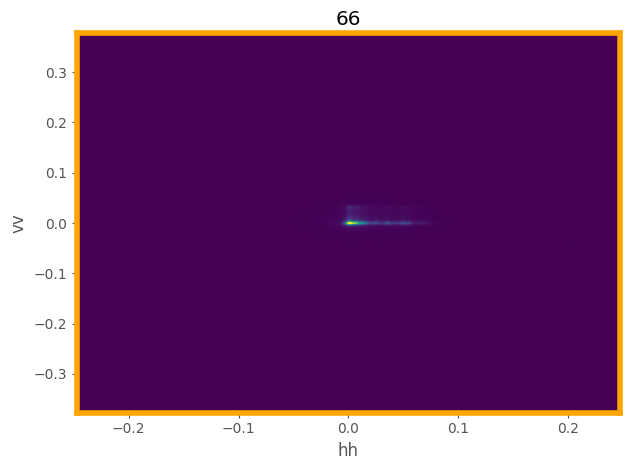

Trial number 94
Trial values: peak_distance 4.801e-03 fwhm -1.109e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3904667068583827, 'h_fwhm': 0.012355720240853074, 'h_centroid': 0.00042103134146037613, 'h_peak': -0.0022760537285780058, 'v_sigma': 0.45772534768913076, 'v_fwhm': 0.006502540054709183, 'v_centroid': 0.005591063157720372, 'v_peak': 0.004226651035560713, 'integral_intensity': 285.0945593262807, 'peak_intensity': 65371.83, 'gaussian_fit': {}}}
Actual fwhm 0.013962336832827221


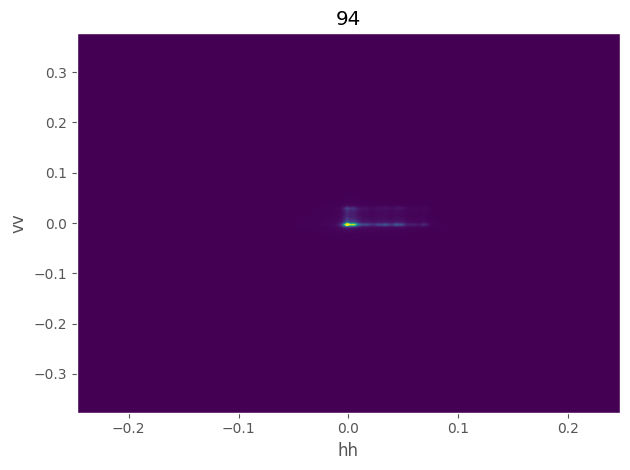

Trial number 97
Trial values: peak_distance 3.085e-03 fwhm -1.109e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39070924562761544, 'h_fwhm': 0.03316535433071088, 'h_centroid': -0.0002300687693293224, 'h_peak': -0.0029263547938860714, 'v_sigma': 0.45792349072530286, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.0057718778547618255, 'v_peak': 0.000975381008206341, 'integral_intensity': 284.8358902562551, 'peak_intensity': 65359.492, 'gaussian_fit': {}}}
Actual fwhm 0.034070930233799944


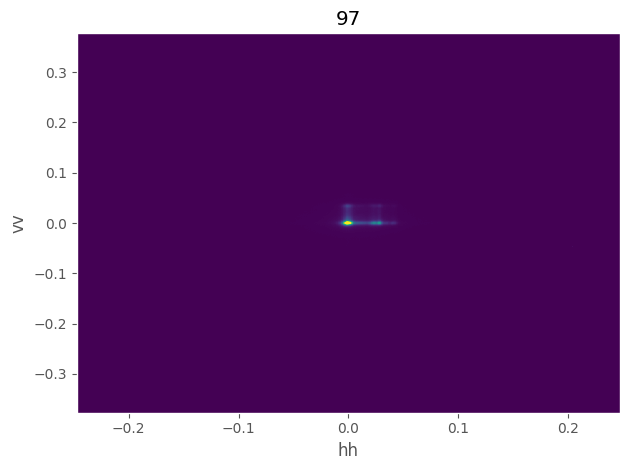

Trial number 102
Trial values: peak_distance 1.896e-03 fwhm -1.109e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3907057807359061, 'h_fwhm': 0.009754515979620848, 'h_centroid': 0.0004703718331375839, 'h_peak': 0.0016257526632700889, 'v_sigma': 0.457813885472001, 'v_fwhm': 0.006502540054709183, 'v_centroid': 0.005857405250195402, 'v_peak': -0.000975381008206341, 'integral_intensity': 284.81624244867623, 'peak_intensity': 65332.0, 'gaussian_fit': {}}}
Actual fwhm 0.011723208142815505


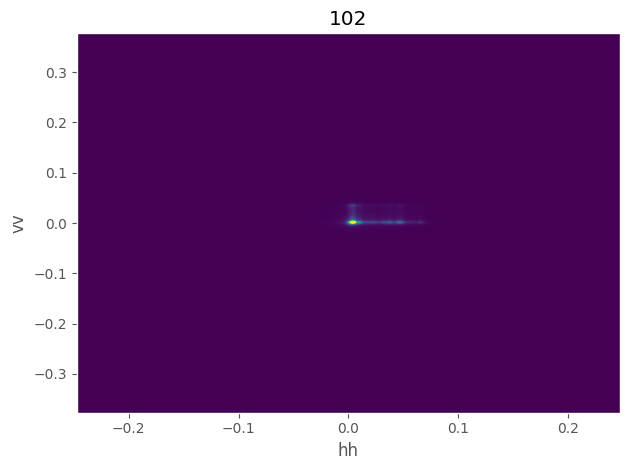

Trial number 119
Trial values: peak_distance 8.639e-03 fwhm -1.109e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3904191065982344, 'h_fwhm': 0.015607225567393357, 'h_centroid': 0.00024929228595457764, 'h_peak': -0.00812876331635015, 'v_sigma': 0.45744488920332604, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.005465379766644546, 'v_peak': 0.0029261430246188755, 'integral_intensity': 285.4872177838034, 'peak_intensity': 65470.188, 'gaussian_fit': {}}}
Actual fwhm 0.017449156112155022


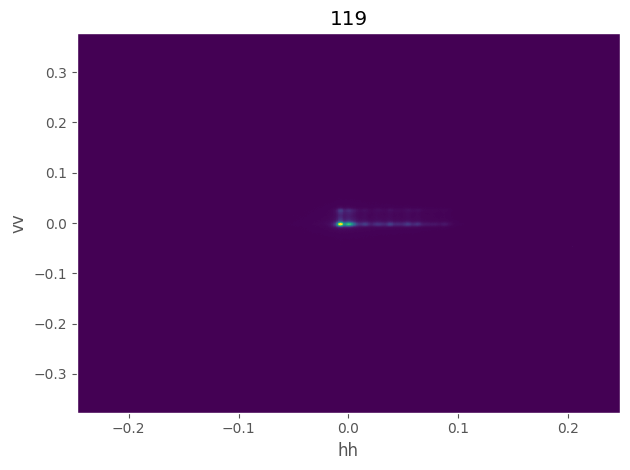

Trial number 146
Trial values: peak_distance 4.598e-04 fwhm -1.097e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39041864324212017, 'h_fwhm': 0.01690782769800947, 'h_centroid': 0.0011017168042055103, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.4574437084013716, 'v_fwhm': 0.008453302071121938, 'v_centroid': 0.005563582164195724, 'v_peak': -0.00032512700273549627, 'integral_intensity': 285.33693641261146, 'peak_intensity': 58067.2, 'gaussian_fit': {}}}
Actual fwhm 0.01890325245483461


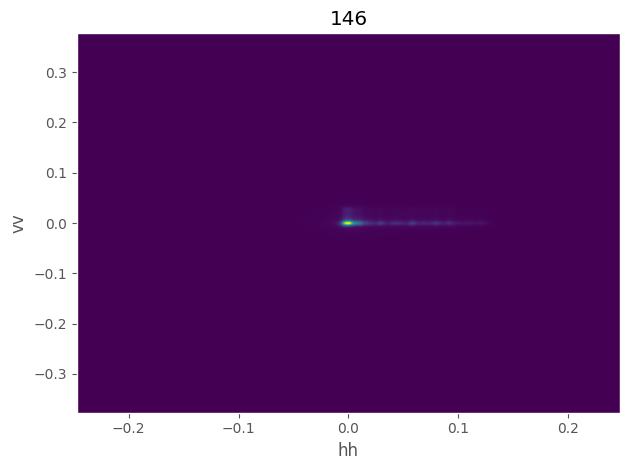

In [42]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    print("Actual fwhm", opt_common._get_fwhm_from_dw(t.user_attrs["dw"]))
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    if t.number == nash_trial.number:
        for axis in ['top','bottom','left','right']:
            plt.gca().spines[axis].set_linewidth(4)
            plt.gca().spines[axis].set_color('orange')
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.title(t.number)
    plt.tight_layout()
    plt.show()

Result: Seems like the beam is too spread out in all the cases.

In [43]:
pareto_df = analysis.get_pareto_dataframe_from_study(study, ['peak', 'delta_fwhm'])

In [44]:
pareto_df

,number,peak,delta_fwhm,h_peak,v_peak,h_fwhm,v_fwhm,peak_intensity
66,66,0.001028,-11.086062,0.000325,0.000975,0.018208,0.006503,65255.308594
94,94,0.004801,-11.087847,-0.002276,0.004227,0.012356,0.006503,65371.828125
97,97,0.003085,-11.087658,-0.002926,0.000975,0.033165,0.007803,65359.492188
102,102,0.001896,-11.087237,0.001626,-0.000975,0.009755,0.006503,65332.000000
119,119,0.008639,-11.089350,-0.008129,0.002926,0.015607,0.007803,65470.187500
146,146,0.000460,-10.969357,-0.000325,-0.000325,0.016908,0.008453,58067.199219


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_91035/3778268168.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "nlpi"], include_dominated_trials=False)


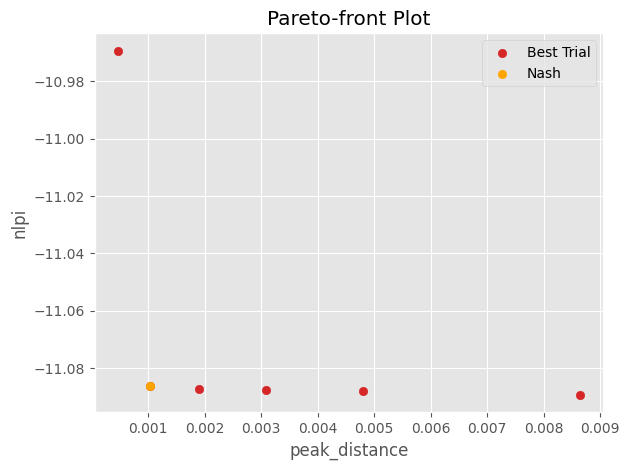

In [45]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "nlpi"], include_dominated_trials=False)
plt.scatter(*nash_trial.values, color='orange', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_91035/320309324.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


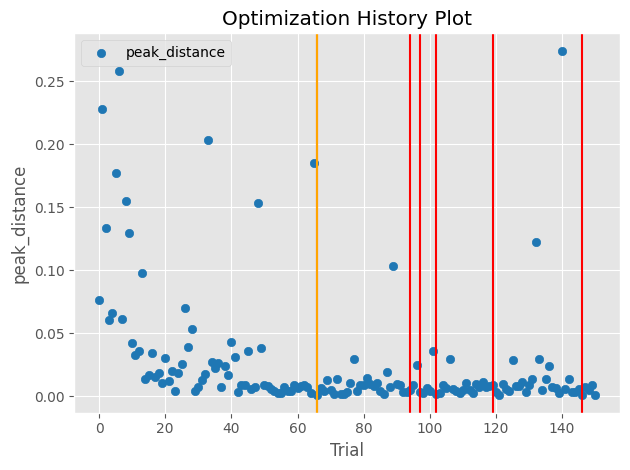

In [46]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_91035/205058893.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="nlpi")


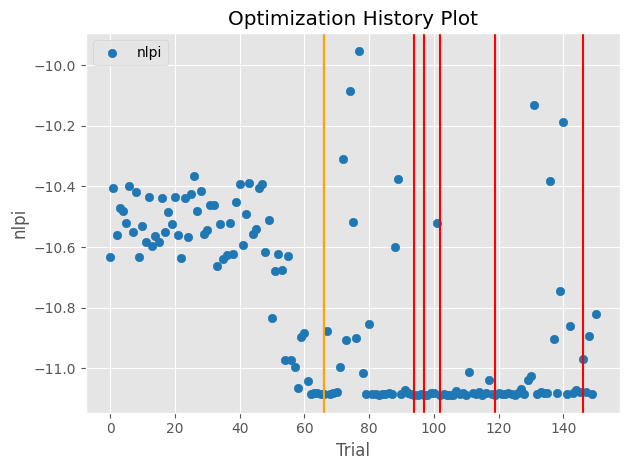

error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
CAC: error = "Network is unreachable" sending UDP msg to 192.168.0.255:5064
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Ne

In [47]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="nlpi")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

Trial number 79
Trial values: peak_distance 4.598e-04 fwhm 1.433e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3905670010735646, 'h_fwhm': 0.01885873089393364, 'h_centroid': 0.0005517121010972792, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.45766873625762505, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.0057594896642604865, 'v_peak': -0.00032512700273549627, 'integral_intensity': 284.9587837744583, 'peak_intensity': 65045.875, 'gaussian_fit': {}}}


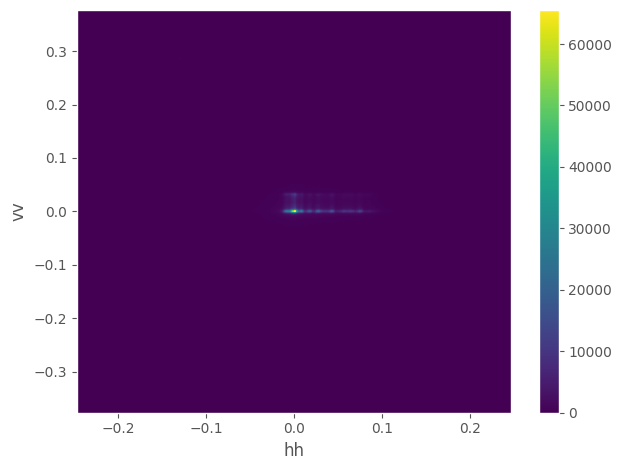

Trial number 98
Trial values: peak_distance 6.583e-03 fwhm 2.584e-04
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3906831300399076, 'h_fwhm': 0.018208429828625583, 'h_centroid': 0.0005740670810941984, 'h_peak': 0.0035766558591939883, 'v_sigma': 0.45780228752575697, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.006148491649214716, 'v_peak': -0.0055271590465025494, 'integral_intensity': 285.0382951500322, 'peak_intensity': 64420.555, 'gaussian_fit': {}}}


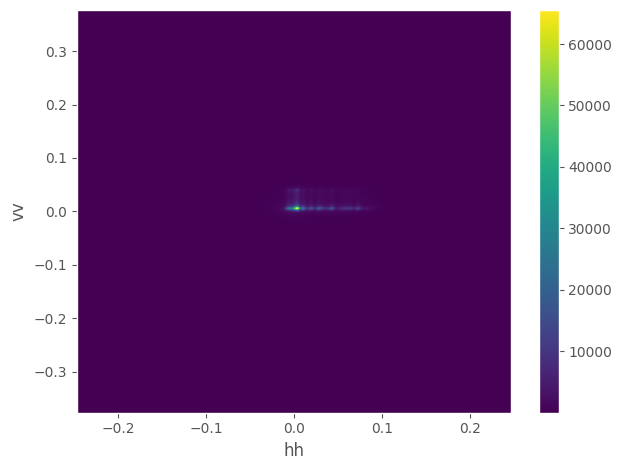

In [195]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.tight_layout()
    plt.colorbar()
    plt.show()

Result: Seems like the beam is too spread out in all the cases.

In [59]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [60]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)

[147, 133]
79 [0.00045981565522817996, 0.0014334106393386306]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3905670010735646, 'h_fwhm': 0.01885873089393364, 'h_centroid': 0.0005517121010972792, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.45766873625762505, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.0057594896642604865, 'v_peak': -0.00032512700273549627, 'integral_intensity': 284.9587837744583, 'peak_intensity': 65045.875, 'gaussian_fit': {}}}


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/2856276465.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "fwhm"], include_dominated_trials=False)


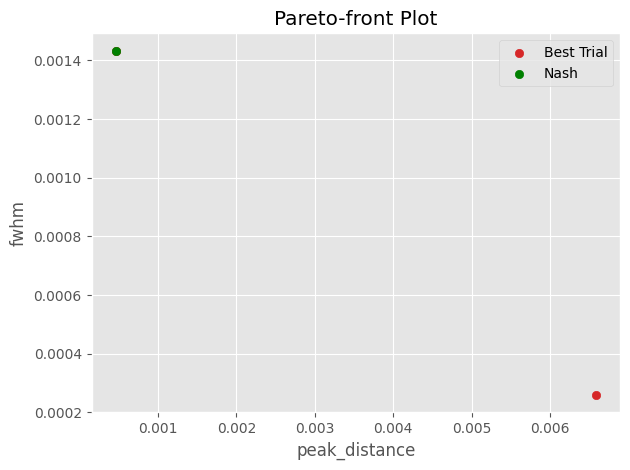

In [61]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "fwhm"], include_dominated_trials=False)
plt.scatter(*nash_trial.values, color='green', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/3765395746.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


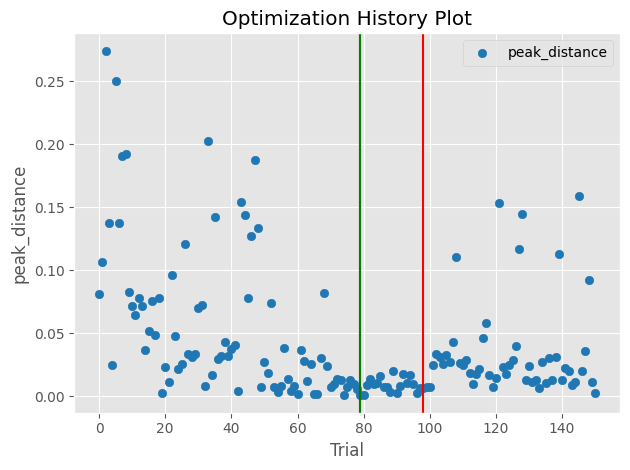

In [62]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/3053359392.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")


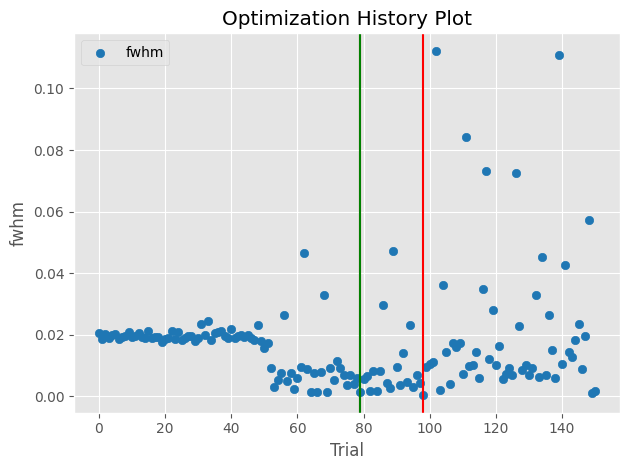

In [63]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [64]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    isum1, wsum1 = analysis.calculate_weighted_sum(h, threshold=0)
    isum2, wsum2 = analysis.calculate_weighted_sum(h)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


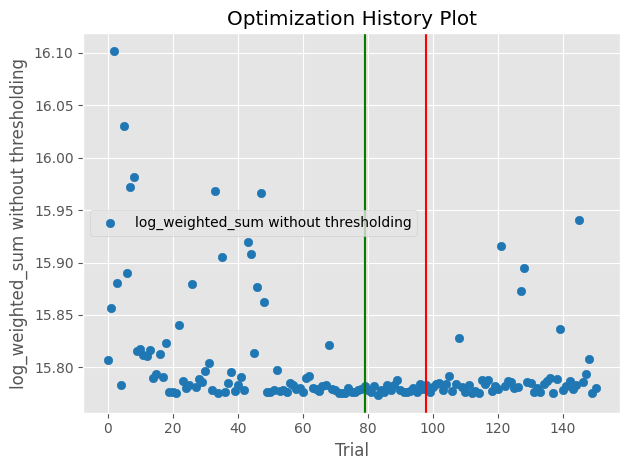

In [65]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


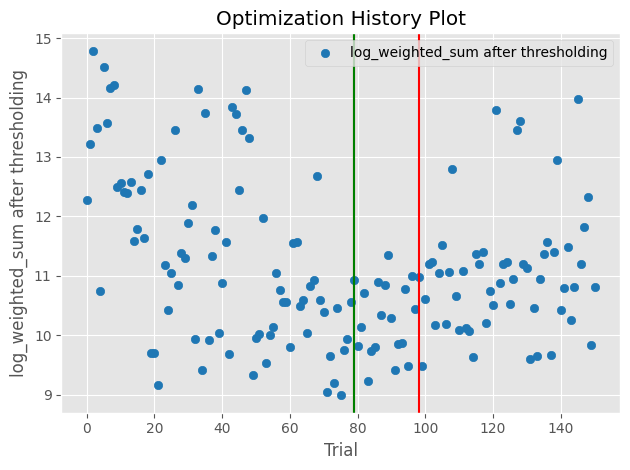

In [66]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [67]:
test_val_fns = [lambda t: t.values[0], lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1], test_val_fns)
print(np.argmax(domins))

80


19 [0.0024761212909399093, 9.708497626283531]


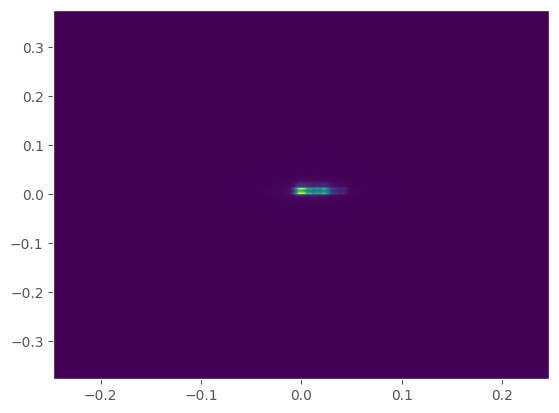

42 [0.003707119309639163, 9.685569474581012]


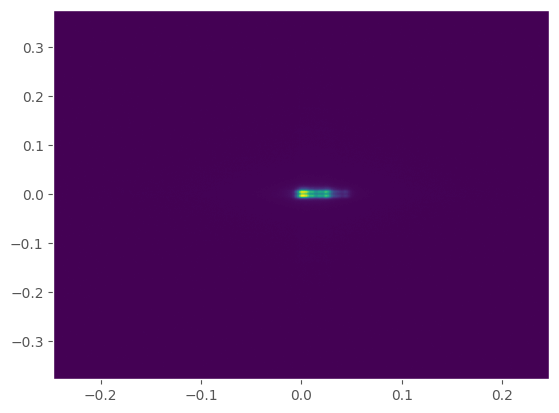

49 [0.007138387169689441, 9.326017743272079]


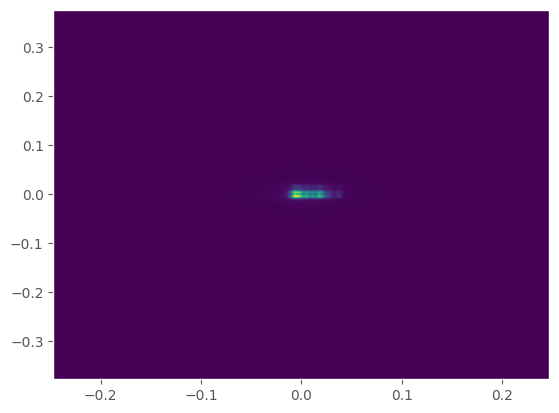

60 [0.0013794469656845396, 9.807600464924667]


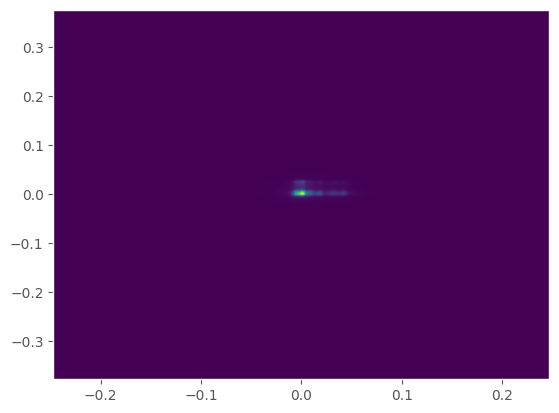

75 [0.007485158438956861, 8.986942987623676]


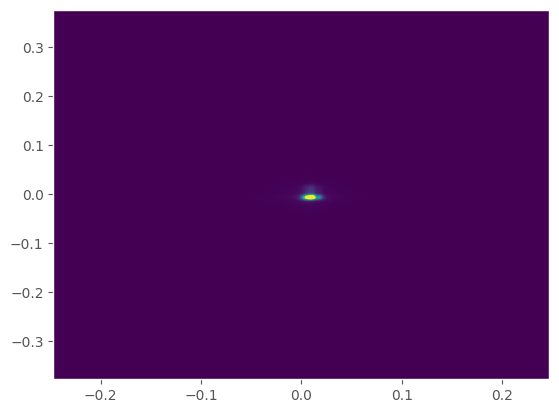

80 [0.00045981565522817996, 9.81599368346983]


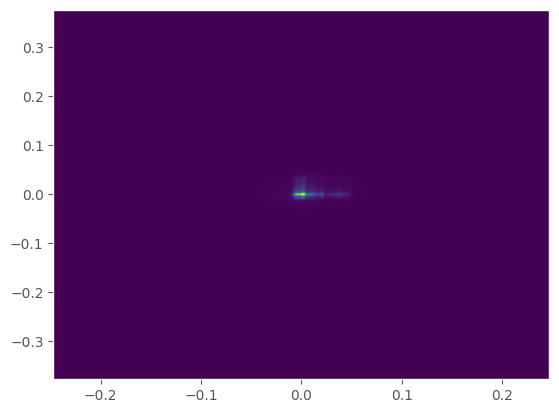

99 [0.006835404912380424, 9.481797461262829]


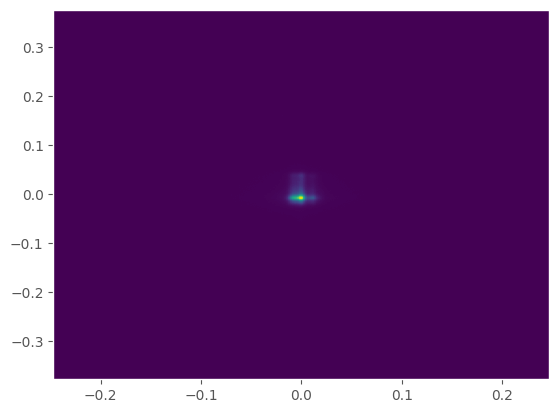

133 [0.006453853459412685, 9.658227856032969]


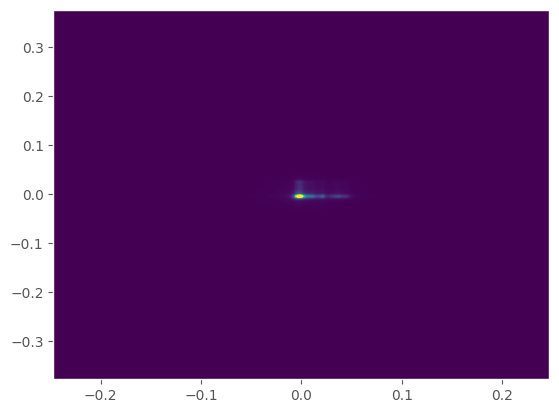

In [68]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [69]:
study.directions

[<StudyDirection.MINIMIZE: 1>, <StudyDirection.MINIMIZE: 1>]

In [70]:
test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins), domins[np.argmax(domins)])

80 113


19 [0.0024761212909399093, 0.03707250065187601, 9.708497626283531]


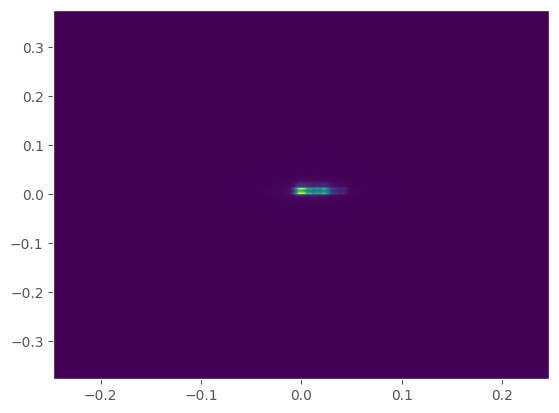

42 [0.003707119309639163, 0.038696517445970656, 9.685569474581012]


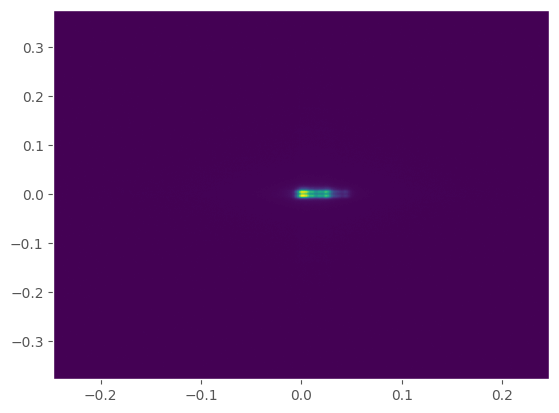

49 [0.007138387169689441, 0.03724310387604322, 9.326017743272079]


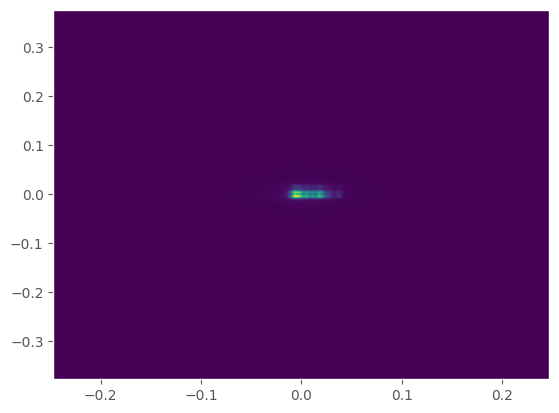

53 [0.007428363872819456, 0.016579265768677073, 9.541027331142681]


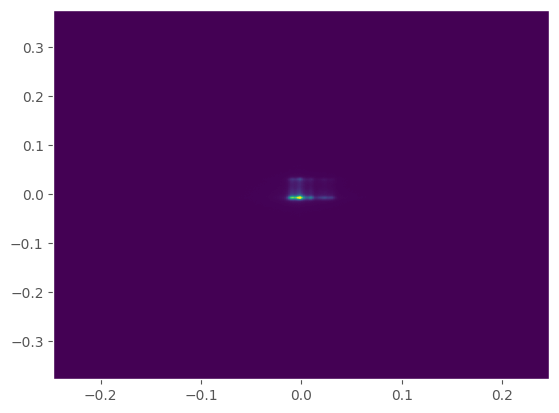

60 [0.0013794469656845396, 0.01665536369323247, 9.807600464924667]


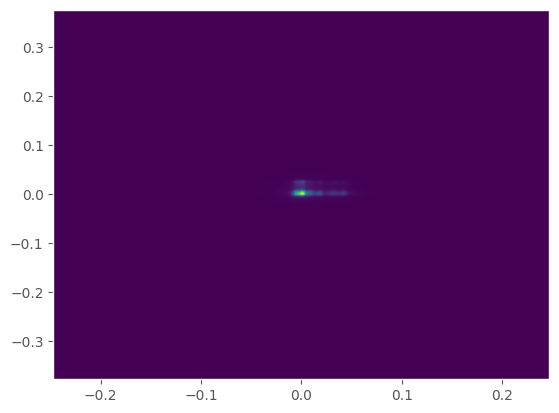

65 [0.001657944296421793, 0.013005682483180311, 10.038764882199679]


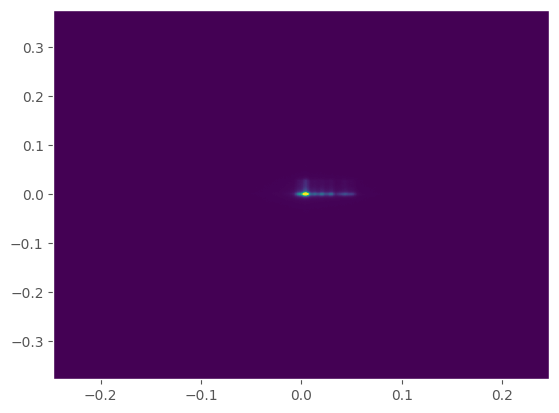

71 [0.009743099191034254, 0.015511766698927357, 9.041789789779042]


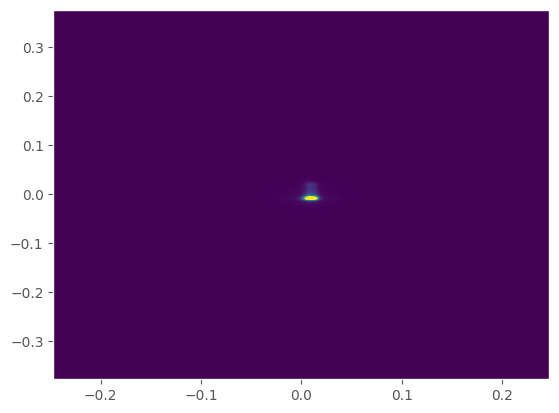

74 [0.0010282088250323164, 0.01316731177190838, 10.464950816343357]


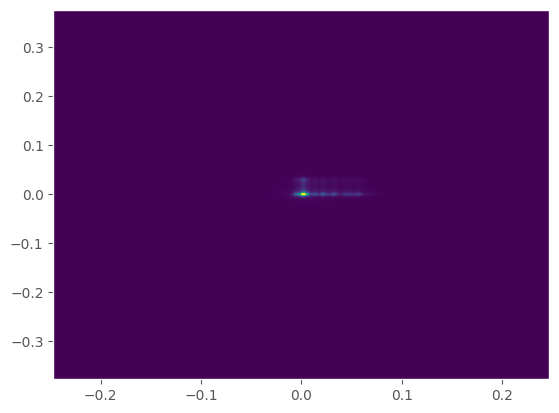

75 [0.007485158438956861, 0.01930159894284732, 8.986942987623676]


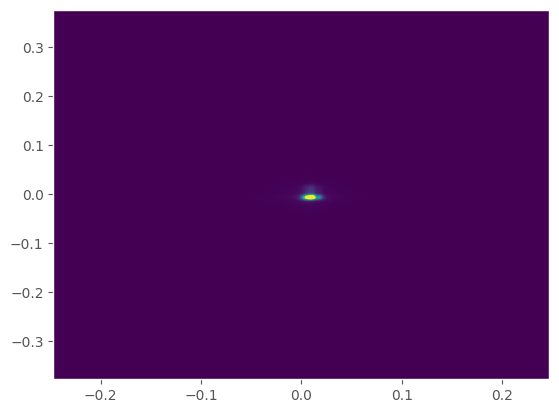

80 [0.00045981565522817996, 0.014613397338917686, 9.81599368346983]


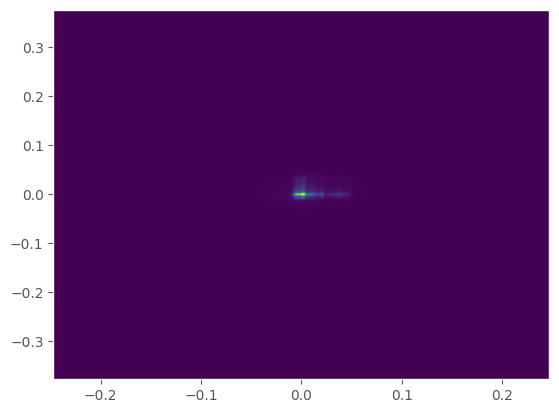

83 [0.009699755620155605, 0.01701935856999312, 9.235032427681148]


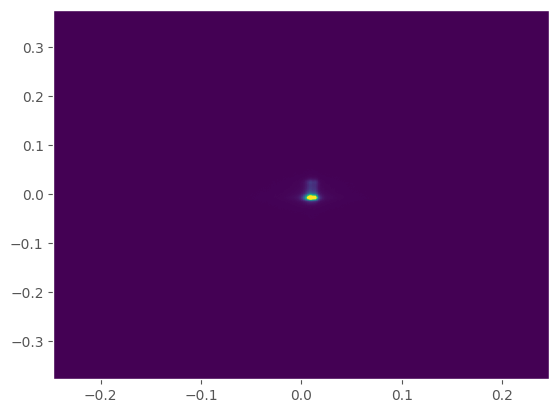

90 [0.0027969822618434796, 0.011073893725051806, 10.28537953142773]


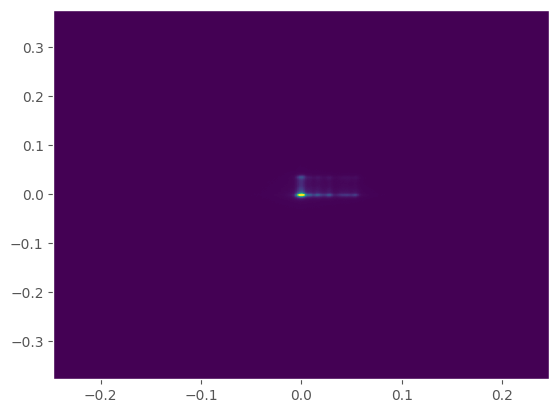

99 [0.006835404912380424, 0.021171436196469627, 9.481797461262829]


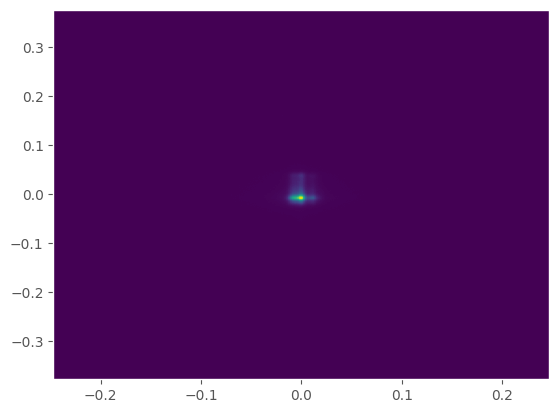

129 [0.012717677721576783, 0.010585784588079523, 11.199661955558447]


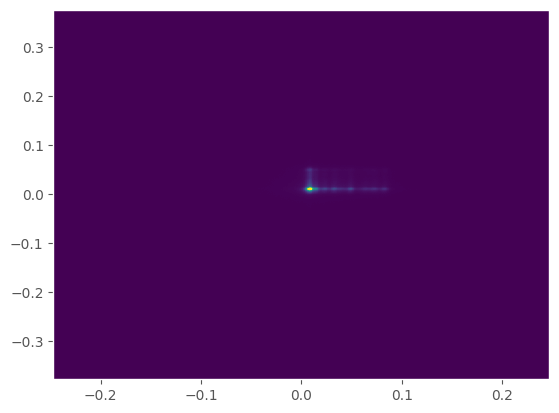

133 [0.006453853459412685, 0.014067849771378605, 9.658227856032969]


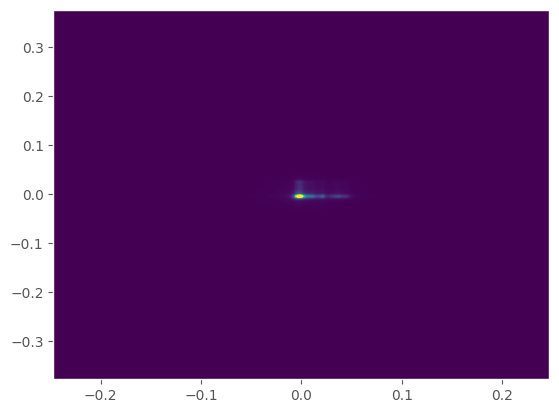

In [71]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()